In [3]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(empirical-cdf)=
# Sampling Estimates of the Cumulative Distribution Function

Let $Y$ be a random variable.
Suppose that $F(y)$ is the cumulative distribution function of $Y$.
We want to estimate $F(y)$ using samples of $Y$.
The key is to observe that it can be written as an expectation using the indicator function:

$$
F(y) = p(Y\le y) = \int_{-\infty}^y p(y)dy = \int_{-\infty}^y 1_{[-\infty,y]}(y)p(y)dy = \mathbb{E}[1_{[-\infty,y]}(Y)].
$$

So, if we had a sample $Y_1,Y_2,\dots,Y_N$ of $Y$, we could estimate $F(y)$ as:

$$
\bar{F}_N(y) = \frac{1}{N}\sum_{i=1}^N1_{[-\infty,y]}(Y_i) = \frac{\text{number of }Y_i \le y}{N}.
$$

This is known as the empirical cumulative distribution function (CDF).
We saw this estimate in [a previous lecture](sample-uniform).
Now you know where it comes from!

When solving the uncertainty propagation problem, we have a random variable $X$ and a function $g$.
We want to estimate the cumulative distribution function of $Y=g(X)$:
Then, we can write:

$$
F(y) = \mathbb{E}[1_{[-\infty,y]}(Y)] = \mathbb{E}[1_{[-\infty,y]}(g(X))].
$$

So, if we have independent samples $X_1,X_2,\dots,X_N$ of $X$, we can estimate $F(y)$ as:

$$
\bar{F}_N(y) = \frac{1}{N}\sum_{i=1}^N1_{[-\infty,y]}(g(X_i)) = \frac{\text{number of }g(X_i) \le y}{N}.
$$

## Example: 1D CDF
We will continue using the 1D test function of Example 3.4 of {cite}`robert_monte_2004`.
Assume that $X\sim U([0,1])$ and pick:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

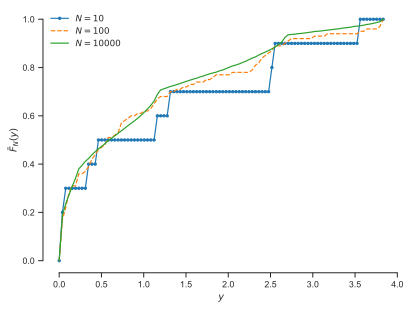

In [5]:
import numpy as np

# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# We will not write code for the empirical CDF as it is already in here:
# https://www.statsmodels.org/stable/generated/statsmodels.distributions.empirical_distribution.ECDF.html
from statsmodels.distributions.empirical_distribution import ECDF

# Maximum number of samples to take
max_n = 10000 
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

# Build ECDF with 10 samples
ecdf_10 = ECDF(y_samples[:10])

# Build ECDF with 50 samples
ecdf_100 = ECDF(y_samples[:100])

# Build ECDF with all samples
ecdf_all = ECDF(y_samples)

# Make the plot
fig, ax = plt.subplots()
# Points on which to evaluate the CDF's
ys = np.linspace(y_samples.min(), y_samples.max(), 100)
ax.plot(ys, ecdf_10(ys), ".-", label=r"$N=10$")
ax.plot(ys, ecdf_100(ys), "--", label=r"$N=100$")
ax.plot(ys, ecdf_all(ys), label=f"$N={max_n:d}$")
ax.set_xlabel("$y$")
ax.set_ylabel(r"$\bar{F}_N(y)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Let's use the empirical CDF to find the probability that $Y$ takes specific values.
For example, we calculate the probability that $Y$ is between $1$ and $3$.
We have:

$$
p(1\le Y\le 3) = F(3) - F(1) \approx \bar{F}_N(3) - \bar{F}_N(1).
$$

Let's calculate this numerically for various choices of $N$:

In [6]:
# Estimate of the probability with 10 samples:
p_Y_in_set_10 = ecdf_10(3.0) - ecdf_10(1.0)
print(f"N = 10:\t\tp(1 <= Y <= 3) ~= {p_Y_in_set_10:.2f}")
# Estimate of the probability with 100 samples:
p_Y_in_set_100 = ecdf_100(3.0) - ecdf_100(1.0)
print(f"N = 100:\tp(1 <= Y <= 3) ~= {p_Y_in_set_100:.2f}")
# Estimate of the probability with all 10000 samples:
p_Y_in_set_all = ecdf_all(3.0) - ecdf_all(1.0)
print(f"N = 1000:\tp(1 <= Y <= 3) ~= {p_Y_in_set_all:.2f}")

N = 10:		p(1 <= Y <= 3) ~= 0.40
N = 100:	p(1 <= Y <= 3) ~= 0.31
N = 1000:	p(1 <= Y <= 3) ~= 0.33


## Questions

+ Why is the empirical CDF for small $N$ discontinuous?
+ How do you know how many samples you need? For now, think about it on your own. We will answer in [Lecture 10](lecture10).
+ Use the best empirical CDF we have constructed so far to find the probability of that $Y$ is in $[0.5, 2]$ or $[3,4]$, i.e., see $p(0.5 \le Y \le 2\;\text{or}\;3\le Y \le 4)$.